In [1]:
"""
cl_model = tf.keras.models.load_model('openSmile_model_selected_features.h5')
Epoch= 9802 acc =  0.9709 sensitivity 0.983 specificity= 0.9911 precision= 0.973
IMG,eps = done
CSV data
Epoch= 4305 acc =  0.9709 sensitivity 0.9976 specificity= 0.9919 precision= 0.9709
"""

"\ncl_model = tf.keras.models.load_model('openSmile_model_selected_features.h5')\nEpoch= 9802 acc =  0.9709 sensitivity 0.983 specificity= 0.9911 precision= 0.973\nIMG,eps = done\nCSV data\nEpoch= 4305 acc =  0.9709 sensitivity 0.9976 specificity= 0.9919 precision= 0.9709\n"

In [1]:
data_dir='./data/voice/processed/'
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

import os
from scipy.io.wavfile import read
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from PIL import Image
import scipy.misc
import cv2
import librosa
from tqdm import tqdm
import numpy as np
import librosa
import librosa.display
import os
import glob
import scipy
import matplotlib.pyplot as plt
import librosa
import IPython
import cv2
from IPython.display import Audio
import soundfile as sf
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tqdm import tqdm
cmap = plt.get_cmap('inferno')
import python_speech_features as mfcc
clean_data = np.load('clean_data.npy',allow_pickle=True)
clean_labels = np.load('clean_labels.npy')
noise_added = np.load('noise_added.npy')
clean_pad = np.load('clean_pad.npy')
denoised = np.load('denoised_audio.npy')
# cl_model.save('openSmile_model_selected_features.h5',overwrite=True)
cl_model = tf.keras.models.load_model('openSmile_model_selected_features.h5')
cl_model.summary()

C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 143)               572       
_________________________________________________________________
dense (Dense)                (None, 5000)              720000    
_________________________________________________________________
dropout (Dropout)            (None, 5000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3500)              17503500  
_________________________________________________________________
dropout_1 (Dropout)          (None, 3500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2500)              8752500   
_________________________________________________________________
dropout_2 (Dropout)          (None, 2500)              0

In [2]:
# len(denoised[0])
# cl_model = tf.keras.models.load_model('UNET_PPR_100.h5')
# cl_model.summary()

  0%|                                                                                  | 1/817 [00:00<02:30,  5.44it/s]


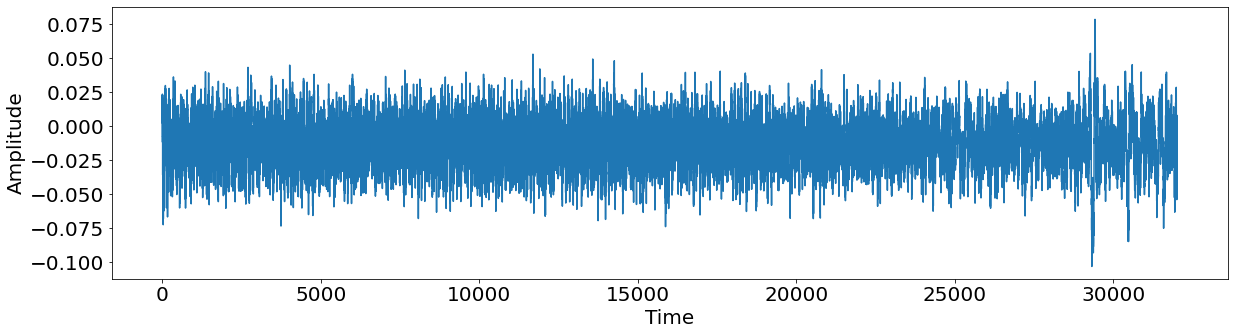

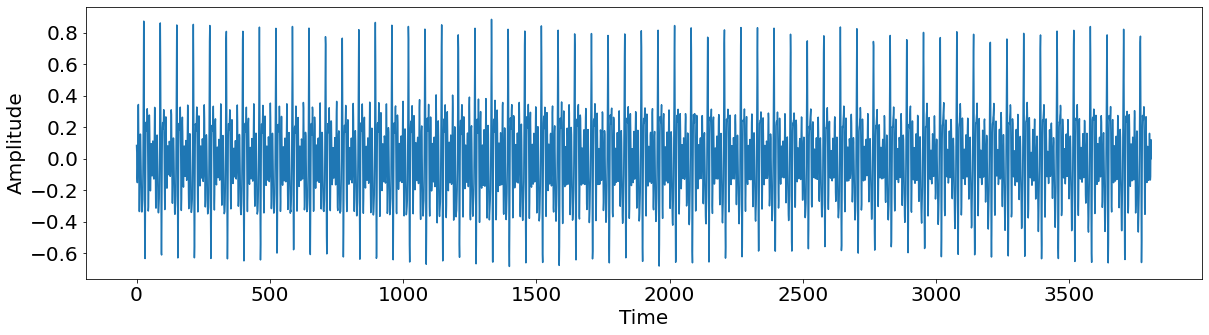

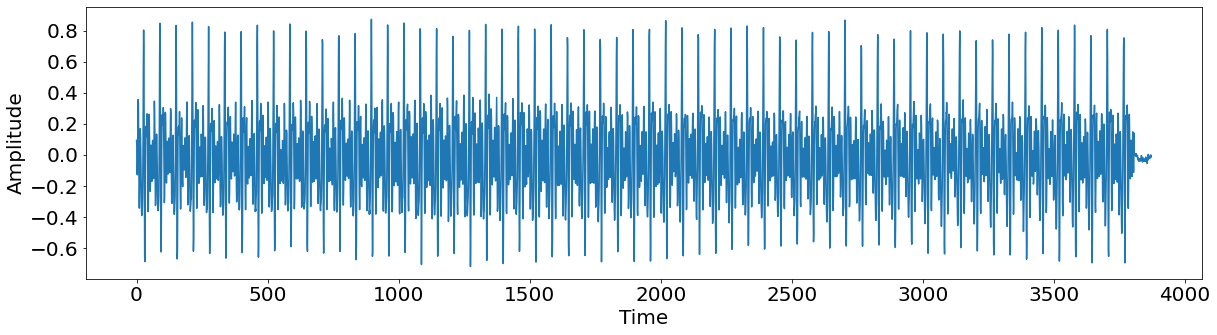

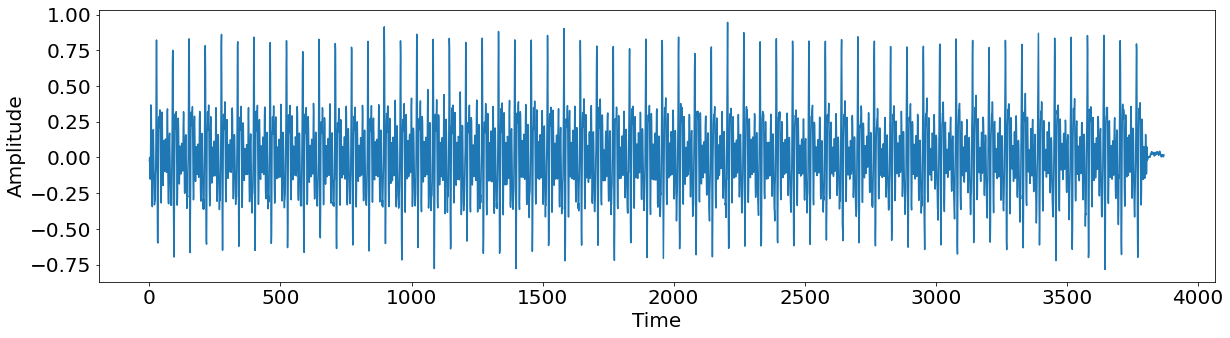

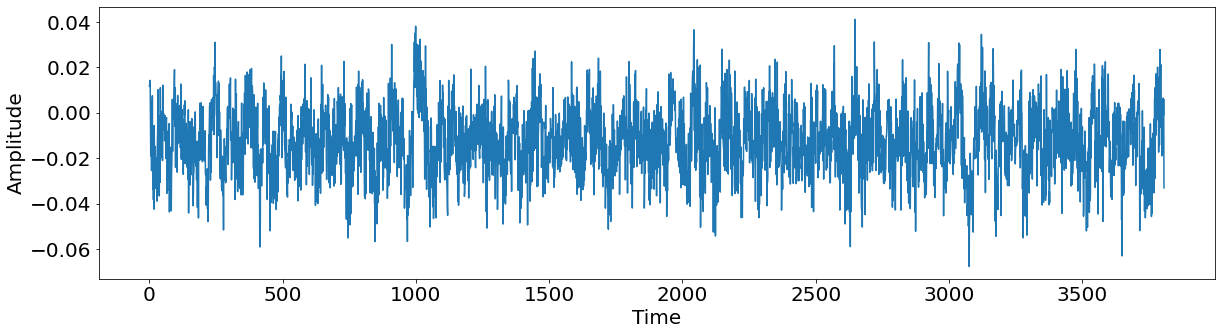

In [3]:
data = []
labels=[]
count = 10
directory = './data/noise/audio'
for root, dirnames, filenames in os.walk(directory):
    for filename in tqdm(filenames):
        if filename.endswith('.wav'):
            clas = filename.split('-')[1]
            if clas=='0':
                x,samplerate = librosa.load(os.path.join(root, filename),sr=8000);  # Reading the audio file
                break
nam = ["sample_audio","clean_data","noise_added","denoised"]
tit=[]
for j,i in enumerate([x,clean_data[4],noise_added[4],denoised[4]]):
    plt.figure(figsize=(20,5))
    plt.plot(i)
    plt.ylabel("Amplitude", fontsize=20)
    plt.xlabel("Time", fontsize=20)
    plt.xticks(rotation=0, fontsize=20)
    plt.yticks(rotation=0, fontsize=20)
#     plt.title(tit[j])
#     plt.savefig(f'./IMG/feat/jpg/{nam[j]}.png',bbox_inches='tight',dpi=200)
#     plt.savefig(f'./IMG/feat/eps/{nam[j]}.eps',bbox_inches='tight',dpi=200)
    plt.show()
noisy_data=x[5000:5000+len(clean_data[4])]
plt.figure(figsize=(20,5))
plt.plot(noisy_data)
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("Time", fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
# plt.savefig(f'./IMG/feat/jpg/noise.png',bbox_inches='tight',dpi=100)
# plt.savefig(f'./IMG/feat/eps/noise.eps',bbox_inches='tight',dpi=100)
plt.show()

In [4]:
# clean_data[4]

In [5]:
def signaltonoise_dB(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return 20*np.log10(abs(np.where(sd == 0, 0, m/sd)))

for i in [clean_data[4],denoised[4].flatten(),noise_added[4],noisy_data]:
    i = i/max(i)
    print(signaltonoise_dB(i))

-62.482670860323566
-25.41974153405652
-26.349889608247217
-1.6265178822599171


In [6]:
# noisy_data=x[5000:5000+3809]
# plt.figure(figsize=(20,5))
# plt.plot(noisy_data)
# plt.ylabel("Amplitude")
# plt.xlabel("Time")
# plt.show()
# len(noisy_data)

In [7]:
# # mf =[]
# # st =[]
# # for i in dataset.columns:
# # #     print(i)
# #     if "mfcc" in i:
# #         mf.append(i)
# #     if 'fft' in i:
# #         st.append(i)
# # print(len(mf),len(st))
# # te = pd.read_csv('selected_feature.csv')
# # te
# from scipy.io.wavfile import read
# import matplotlib.pyplot as plt
# k = 6
# %matplotlib inline

# # read audio sample
# plt.figure(figsize=(20,5))
# input_data = read("./data/voice/processed/voice002.wav")
# audio = input_data[1]
# # plt.plot(audio)
# filename1 = '/GD/My Drive/../audio/numb.m4a'
# plt.figure(figsize=(15,4))
# data1,sample_rate1 = librosa.load("./data/voice/processed/voice002.wav", sr=8000, mono=True, res_type='kaiser_best')
# librosa.display.waveplot(data1[2000:2500],sr=sample_rate1, max_points=100000.0, x_axis='time', offset=0.0)
# plt.ylabel("Amplitude", fontsize=25)
# plt.xlabel("Time", fontsize=25)
# plt.title("Sample audio", fontsize=25)
# plt.savefig('./IMG/feat/jpg/sample_audio_2.png',bbox_inches='tight',dpi=200)
# plt.savefig('./IMG/feat/eps/sample_audio_2.eps',bbox_inches='tight',dpi=200)




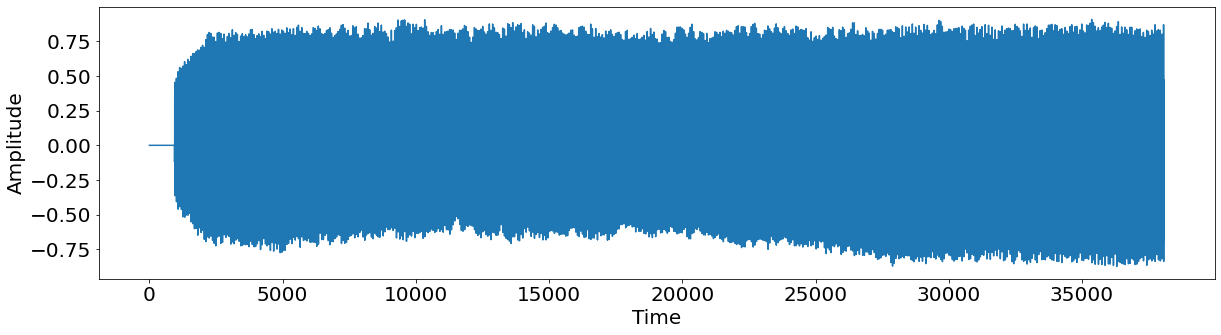

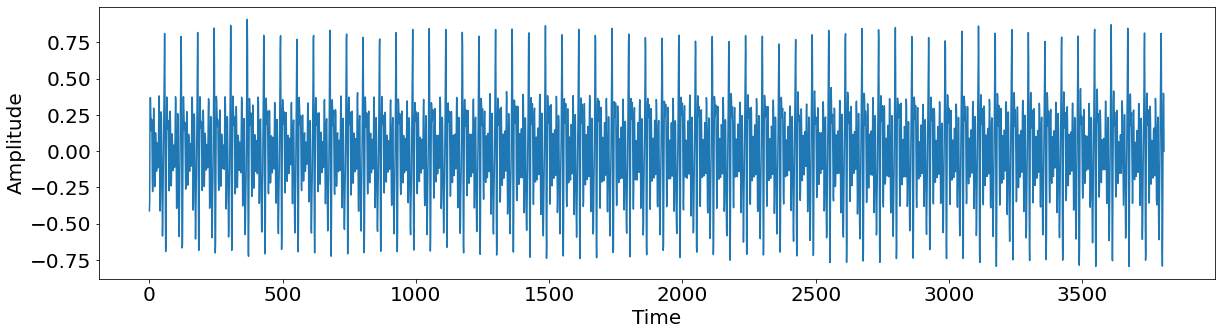

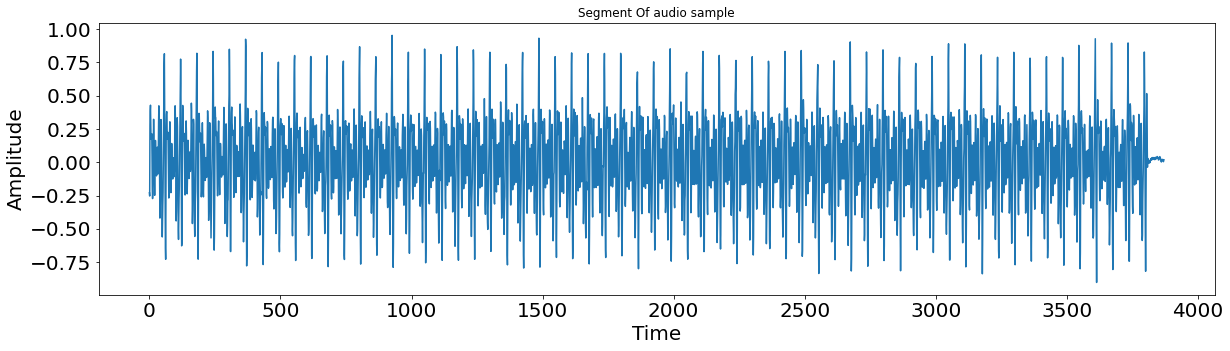

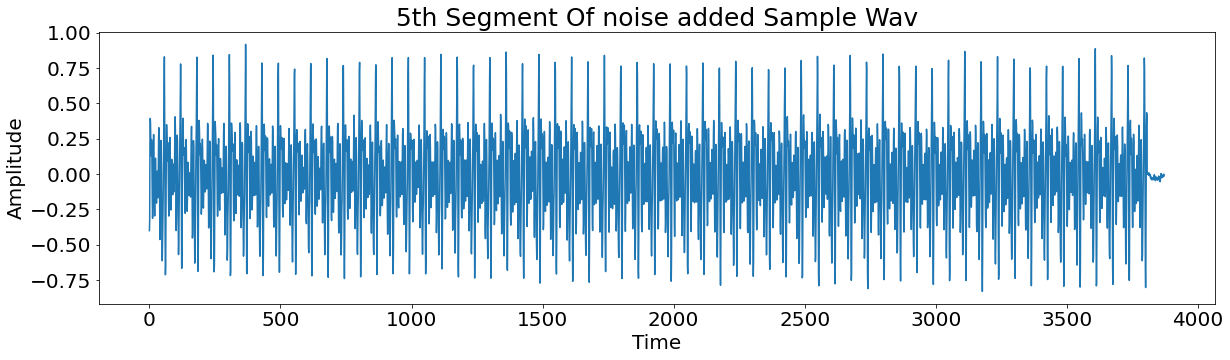

In [8]:
# spf = wav.open("./data/voice/processed/voice001.wav", "r")
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
k = 6
%matplotlib inline

# read audio sample
plt.figure(figsize=(20,5))
input_data = read("./data/voice/processed/voice002.wav")
audio = input_data[1]
plt.plot(audio)
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("Time", fontsize=20)
# plt.title("Sample audio", fontsize=25)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
# plt.savefig('./IMG/feat/jpg/sample_audio.png',bbox_inches='tight',dpi=200)
# plt.savefig('./IMG/feat/eps/sample_audio.eps',bbox_inches='tight',dpi=200)

plt.show()

plt.figure(figsize=(20,5))
plt.plot(clean_data[k])
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("Time", fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
# plt.title("5th Segment Of Sample Wav", fontsize=20)
# plt.savefig('./IMG/feat/jpg/sample_audio_segment.png',bbox_inches='tight',dpi=200)
# plt.savefig('./IMG/feat/eps/sample_audio_segment.eps',bbox_inches='tight',dpi=200)
plt.show()

plt.figure(figsize=(20,5))
plt.plot(denoised[k])
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("Time", fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.title("Segment Of audio sample")
# plt.savefig('./IMG/feat/jpg/sample_audio.png',bbox_inches='tight',dpi=100)
# plt.savefig('./IMG/feat/eps/sample_audio.eps',bbox_inches='tight',dpi=100)
plt.show()

plt.figure(figsize=(20,5))
plt.plot(noise_added[k])
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("Time", fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.title("5th Segment Of noise added Sample Wav", fontsize=25)
plt.show()

(1648, 143) (412, 143) (1648, 4) (412, 4)
                        precision    recall  f1-score   support

               Healthy       0.98      0.93      0.95       121
Hyperkinetic
Dysphonia       0.92      0.98      0.95       129
 Hypokinetic
Dysphonia       0.93      0.92      0.93        77
     Reflux
Laryngitis       0.96      0.96      0.96        85

              accuracy                           0.95       412
             macro avg       0.95      0.95      0.95       412
          weighted avg       0.95      0.95      0.95       412

[[112   6   1   2]
 [  1 126   2   0]
 [  0   5  71   1]
 [  1   0   2  82]]
SPECIFICiTY= [0.99312715 0.96113074 0.98507463 0.99082569]


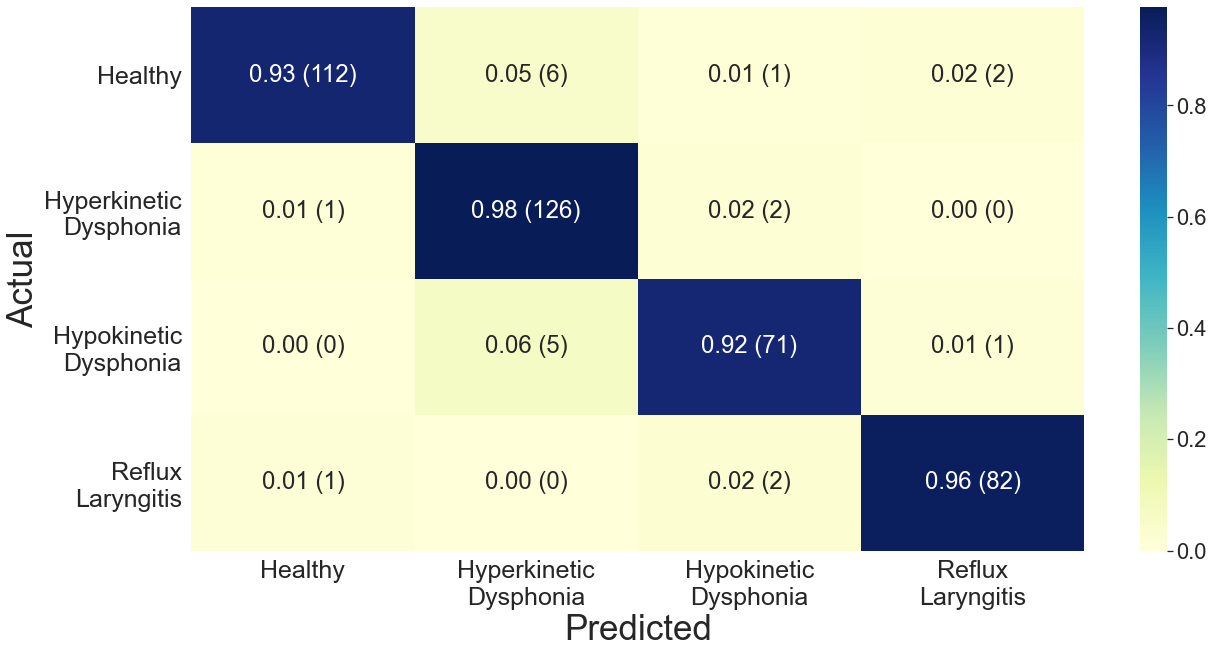

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
output_matrix = to_categorical(clean_labels, num_classes = 4)
data = './selected_feature.csv'
seed = 9
np.random.seed(seed)

# load pima indians dataset
dataset =  pd.read_csv(data)
dataset = dataset.drop(['Unnamed: 0'],axis=1)

(X_train, X_test, y_train, y_test) = train_test_split(dataset, output_matrix, test_size=0.2, random_state=seed,shuffle=True)
# X_train=X_train.values
# y_train=y_train.values
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_pred = cl_model.predict(X_test)

# target_names = ['healthy', 'hyperkinetic dysphonia', 'hypokinetic dysphonia','reflux laryngitis']
target_names = ['Healthy', 'Hyperkinetic\nDysphonia', 'Hypokinetic\nDysphonia','Reflux\nLaryngitis']

import sklearn
import seaborn as sns
# from s
print(sklearn.metrics.classification_report(np.argmax(y_test,axis =-1), np.argmax(y_pred,axis =-1), labels=[0,1,2,3], target_names=target_names))
print(sklearn.metrics.confusion_matrix(np.argmax(y_test,axis =-1), np.argmax(y_pred,axis =-1), labels=[0,1,2,3]))
# tn, fp, fn, tp = sklearn.metrics.confusion_matrix(list(np.argmax(y_test,axis =-1)), list(np.argmax(y_pred,axis =-1))).ravel()
# specificity = tn / (tn+fp)

# from sklearn.metrics import recall_score

# specificity = recall_score(list(np.argmax(y_test,axis =-1)), list(np.argmax(y_pred,axis =-1)), pos_label=0,average = None)
# print("SPECIFICiTY=", specificity)
from sklearn.metrics import multilabel_confusion_matrix
mcm = multilabel_confusion_matrix(list(np.argmax(y_test,axis =-1)), list(np.argmax(y_pred,axis =-1)))

tps = mcm[:, 1, 1]
tns = mcm[:, 0, 0]

specificity = tns / (tns + mcm[:, 0, 1])         # Specificity
print("SPECIFICiTY=", specificity)
def plot_conf_mat(Ground_Truth_Labels, Predictions):
  confusion_matrix_raw = sklearn.metrics.confusion_matrix(Ground_Truth_Labels, Predictions, normalize=None)
  confusion_matrix_norm = sklearn.metrics.confusion_matrix(Ground_Truth_Labels, Predictions, normalize='true')
  shape = confusion_matrix_raw.shape
  data = np.asarray(confusion_matrix_raw, dtype=int)
  text = np.asarray(confusion_matrix_norm, dtype=float)
  annots = (np.asarray(["{0:.2f} ({1:.0f})".format(text, data) for text, data in zip(text.flatten(), data.flatten())])).reshape(shape[0],shape[1])
  fig = plt.figure(figsize=(20, 10))
  sns.set(font_scale=2)
  g = sns.heatmap(confusion_matrix_norm, cmap='YlGnBu', annot=annots, fmt='', xticklabels=target_names, yticklabels=target_names)
  g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 25) 
  g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 25) 
#   plt.title('MLP Confusion Matrix', fontsize=25)
  plt.xlabel("Predicted", fontsize=35)
  plt.ylabel("Actual", fontsize=35)
#   plt.savefig('./IMG/feat/jpg/MLP_CM.png',bbox_inches='tight',dpi=200)
#   plt.savefig('./IMG/feat/eps/MLP_CM.eps',bbox_inches='tight',dpi=200)
#
plot_conf_mat(np.argmax(y_test,axis =-1), np.argmax(y_pred,axis =-1))

[2 1 0]
[2 1 0]
[2 1 0]
[2 1 0]
ROC AUC score: 0.9666173362802463


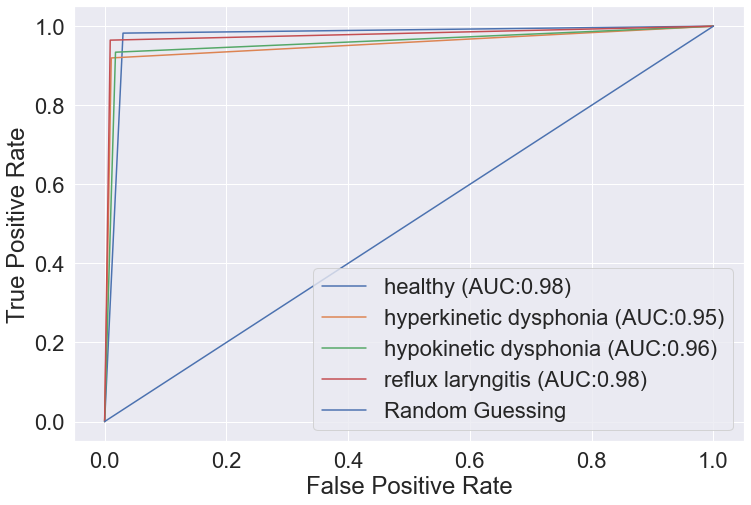

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [10]:


target= ['healthy', 'hyperkinetic dysphonia', 'hypokinetic dysphonia','reflux laryngitis']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        print(thresholds)
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(np.argmax(y_pred,axis =-1).tolist(),np.argmax(y_test,axis =-1).tolist()))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()
fig.savefig('./IMG/feat/jpg/MLP_AUC.png',bbox_inches='tight',dpi=200)
fig.savefig('./IMG/feat/eps/MLP_AUC.eps',bbox_inches='tight',dpi=200)


In [11]:
gradients=[]
def my_CE(y_true, y_pred):
    smoothing =0.01
    log_y_pred = tf.math.log(y_pred+smoothing) 
    element_wise = -tf.math.multiply_no_nan(x=log_y_pred, y=y_true)
    return tf.reduce_mean(tf.reduce_sum(element_wise,axis=1))

for samp,expected_output in tqdm(zip(dataset.values,output_matrix)):
    with tf.GradientTape() as tape:
        # cast image to float
        inputs = tf.cast(np.reshape(samp,(1,143)),dtype='float32')

        # watch the input pixels
        tape.watch(inputs)

        # generate the predictions
        predictions = cl_model(inputs)

        # get the loss
#         print(expected_output, np.reshape(predictions,(1,4))[0])
#         loss = tf.keras.losses.categorical_crossentropy(
#             expected_output, predictions[0]
#         )

        loss =my_CE(expected_output,predictions) 
#         print(expected_output, predictions[0],loss)

    # get the gradient with respect to the inputs
    # K.gradients(K.mean(model.layers[-2].output[0, :], axis=-1), model.layers[-5].layers[-2].output)[0]
    gradients.append(tape.gradient(loss, inputs)[0])

2060it [00:19, 103.81it/s]


['jitterLocal_....', 'pcm_zcr_sma_....', 'pcm_fftMag_s....', 'mfcc_sma_de[....', 'pcm_fftMag_s....']
[147.73547, 76.27929, 13.508297, 11.006351, 5.8212147]


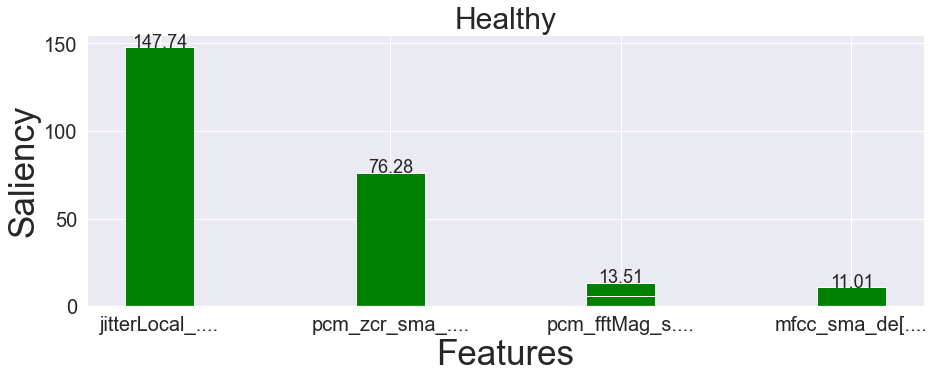

['pcm_zcr_sma_....', 'jitterLocal_....', 'audSpec_Rfil....', 'F0final_sma_....', 'pcm_fftMag_s....']
[283.69415, 93.24184, 83.42048, 66.1088, 64.49389]


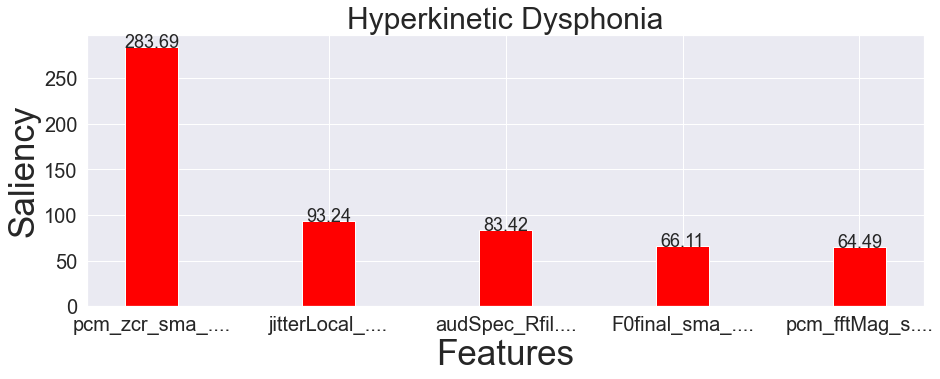

['voicingFinal....', 'pcm_fftMag_s....', 'pcm_fftMag_f....', 'pcm_RMSenerg....', 'pcm_fftMag_s....']
[34.79066, 34.514442, 19.63384, 15.2669735, 12.455588]


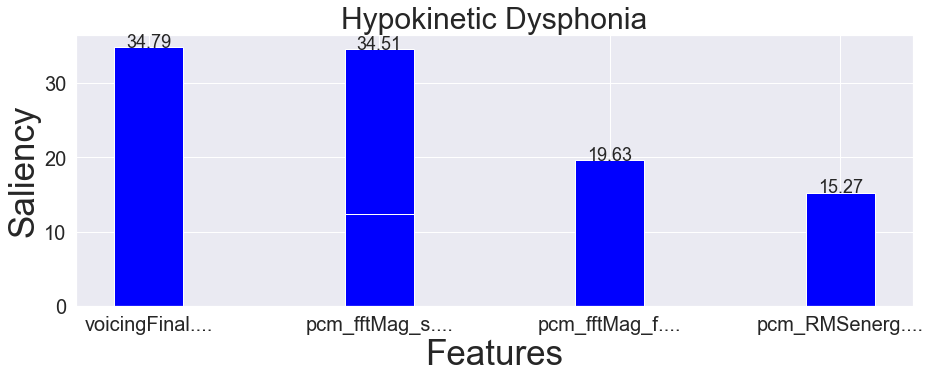

['pcm_fftMag_s....', 'voicingFinal....', 'voicingFinal....', 'pcm_fftMag_f....', 'audSpec_Rfil....']
[69.35082, 51.765877, 35.250946, 23.841913, 22.780416]


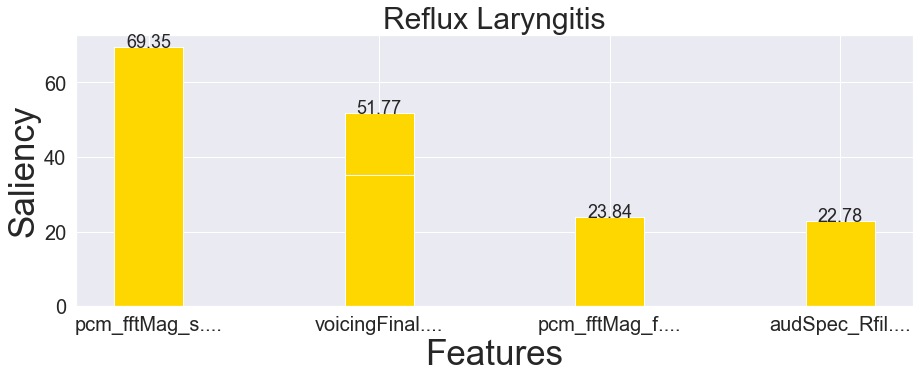

In [12]:
red_grad = np.mean(gradients,axis=0)
from collections import defaultdict
dic = defaultdict(list)
for i,e in zip(gradients,clean_labels):
    dic[e].append(i)
import operator
target_names = ['Healthy', 'Hyperkinetic Dysphonia', 'Hypokinetic Dysphonia','Reflux Laryngitis']
def addlabels(p,o,nam):
    if nam =='Hyperkinetic Dysphonia':
        le = 5
    else:
        le= 4
    if nam == 'Reflux Laryngitis':
        o.pop(2)
    for i in range(le):
        plt.text(i, round(o[i],2), round(o[i],2), fontsize = 18, ha = 'center')
        #,bbox = dict(facecolor = 'gray', alpha =.8)
for i in dic.keys():
    plt.figure(figsize=(15,5))
        
    class_red = np.sum(dic[i],axis=0)
    class_red = class_red
    x = []
    y = []
    k = 5
    cmap = ['green','red','blue','gold']
    for h,j in enumerate(class_red):
        if j>0.01:
            x.append(dataset.columns[h])
            y.append(j)
    
#     plt.bar([k for k in range(1,144)],class_red)
    arr = sorted(zip(x,y),key=operator.itemgetter(1),reverse=True)
#     print(arr)
    x = [arr[i][0][:12]+"...." for i in range(len(arr))]
    y = [arr[i][1] for i in range(len(arr))]
#     print(x,y)
    
    plt.bar(x[:k],y[:k],align='center',color =cmap[i], width=0.3)
    print(x[:k])
    print(y[:k])
    addlabels(x[:k],y[:k],target_names[i])
    plt.xticks(rotation=0, fontsize=20)
    plt.yticks(rotation=0, fontsize=20)
    plt.ylim(0)
    plt.title(target_names[i],fontsize=30)
    plt.xlabel("Features", fontsize=35)
    plt.ylabel("Saliency", fontsize=35)
    gg = target_names[i].replace(" ","_")
#     plt.savefig(f'./IMG/feat/jpg/bar_{gg}.png',bbox_inches='tight',dpi=200)
#     plt.savefig(f'./IMG/feat/eps/bar_{gg}.eps',bbox_inches='tight',dpi=200)
    plt.show()   

In [23]:
stft_denoised=[]
for i in tqdm(denoised):
    stft_denoised.append(librosa.stft(np.reshape(i,(3872)),n_fft=2046))
stft_denoised = np.array(stft_denoised)

100%|████████████████████████████████████████████████████████████████████████████| 2060/2060 [00:01<00:00, 1467.98it/s]


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1018, 256)         14592     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 509, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 505, 256)          327936    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 252, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 248, 256)          327936    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 124, 256)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 122, 256)          1

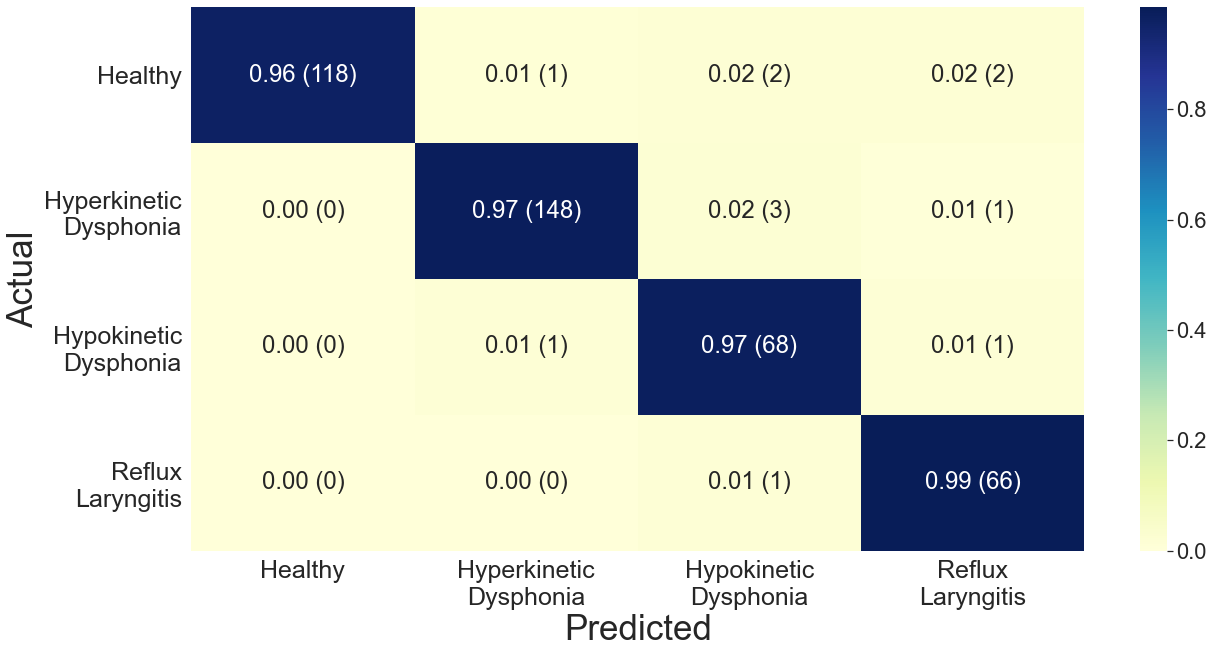

In [24]:
X_train, X_test,y_train, y_test = train_test_split(stft_denoised,output_matrix ,
                                       random_state=98, 
                                       test_size=0.20, 
                                       shuffle=True)
model = tf.keras.models.load_model('final_voice_model_new_2_1_temp.h5')
model.summary()
y_true = np.argmax(y_test,axis =-1)
y_pred = np.argmax(model.predict(X_test),axis =-1)
print(sklearn.metrics.accuracy_score(y_true, y_pred))
print(sklearn.metrics.classification_report(y_true, y_pred,labels=[0,1,2,3], target_names=target_names))
print(sklearn.metrics.confusion_matrix(y_true, y_pred,labels=[0,1,2,3]))
target_names = ['Healthy', 'Hyperkinetic\nDysphonia', 'Hypokinetic\nDysphonia','Reflux\nLaryngitis']
# specificity = recall_score((y_true).tolist(), (y_pred).tolist(), pos_label=0 ,average = None)
# print("SPECIFICiTY=", specificity)
mcm = multilabel_confusion_matrix((y_true).tolist(), (y_pred).tolist())

tps = mcm[:, 1, 1]
tns = mcm[:, 0, 0]

specificity = tns / (tns + mcm[:, 0, 1])         # Specificity
print("SPECIFICiTY=", specificity)
def plot_conf_mat(Ground_Truth_Labels, Predictions):
  confusion_matrix_raw = sklearn.metrics.confusion_matrix(Ground_Truth_Labels, Predictions, normalize=None)
  confusion_matrix_norm = sklearn.metrics.confusion_matrix(Ground_Truth_Labels, Predictions, normalize='true')
  shape = confusion_matrix_raw.shape
  data = np.asarray(confusion_matrix_raw, dtype=int)
  text = np.asarray(confusion_matrix_norm, dtype=float)
  annots = (np.asarray(["{0:.2f} ({1:.0f})".format(text, data) for text, data in zip(text.flatten(), data.flatten())])).reshape(shape[0],shape[1])
  fig = plt.figure(figsize=(20, 10))
  sns.set(font_scale=2)
  g = sns.heatmap(confusion_matrix_norm, cmap='YlGnBu', annot=annots, fmt='', xticklabels=target_names, yticklabels=target_names)
  g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 25) 
  g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 25) 
#   plt.title('STFT Confusion Matrix', fontsize=25)
  plt.xlabel("Predicted", fontsize=35)
  plt.ylabel("Actual", fontsize=35)
#   plt.savefig('./IMG/feat/jpg/STFT_CM.png',bbox_inches='tight',dpi=200)
#   plt.savefig('./IMG/feat/eps/STFT_CM.eps',bbox_inches='tight',dpi=200)
#
plot_conf_mat(y_true, y_pred)

[2 1 0]
[2 1 0]
[2 1 0]
[2 1 0]
ROC AUC score: 0.9815883290095642


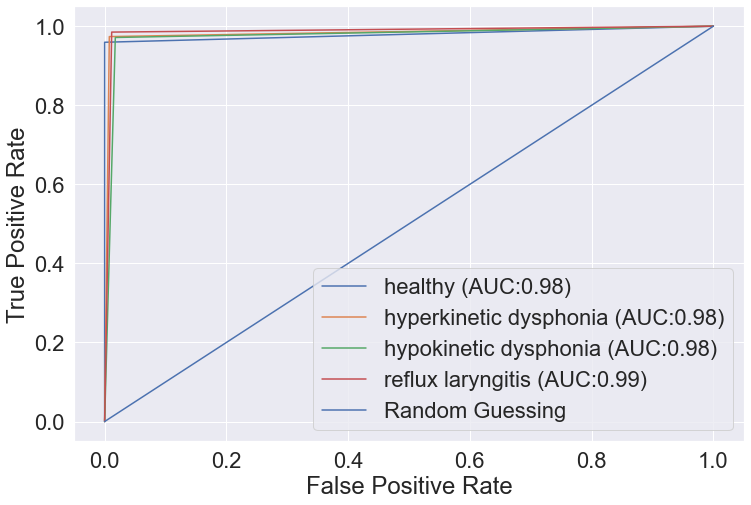

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [25]:
target= ['healthy', 'hyperkinetic dysphonia', 'hypokinetic dysphonia','reflux laryngitis']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        print(thresholds)
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_true, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()
fig.savefig('./IMG/feat/jpg/STFT_AUC.png',bbox_inches='tight',dpi=200)
fig.savefig('./IMG/feat/eps/STFT_AUC.eps',bbox_inches='tight',dpi=200)

In [16]:


model = tf.keras.models.load_model('final_voice_model_new.h5')
assert model.layers[-1].activation == tf.keras.activations.softmax

config = model.layers[-1].get_config()
weights = [x.numpy() for x in model.layers[-1].weights]

config['activation'] = tf.keras.activations.linear
config['name'] = 'logits'

new_layer = tf.keras.layers.Dense(**config)(model.layers[-2].output)
new_model = tf.keras.Model(inputs=[model.input], outputs=[new_layer])
new_model.layers[-1].set_weights(weights)

assert new_model.layers[-1].activation == tf.keras.activations.linear
def my_CE(y_true, y_pred):
    smoothing =0
    log_y_pred = tf.math.log(y_pred+smoothing) 
    element_wise = -tf.math.multiply_no_nan(x=log_y_pred, y=y_true)
    return tf.reduce_mean(tf.reduce_sum(element_wise,axis=1))
gradients =[]

for samp,expected_output in tqdm(zip(stft_denoised,output_matrix)):
    with tf.GradientTape() as tape:
        # cast image to float
        inputs = tf.cast(np.reshape(samp,(1,1024,8)),dtype='float32')

        # watch the input pixels
        tape.watch(inputs)

        # generate the predictions
        predictions = new_model(inputs)

        # get the loss
    #     print(expected_output, predictions)
    #     loss = tf.keras.losses.categorical_crossentropy(
    #         expected_output, (predictions)
    #     )

        loss =my_CE(expected_output,predictions) 
#         print(expected_output, predictions,loss)

    # get the gradient with respect to the inputs
    # K.gradients(K.mean(model.layers[-2].output[0, :], axis=-1), model.layers[-5].layers[-2].output)[0]
    gradients.append(tape.gradient(loss, inputs)[0])
stft_grad=np.zeros((2060,1024,8))
for i in range(len(gradients)):
    stft_grad[i] = gradients[i]
stft_grad.shape

2060it [00:31, 66.34it/s]


(2060, 1024, 8)

193


C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "
C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(

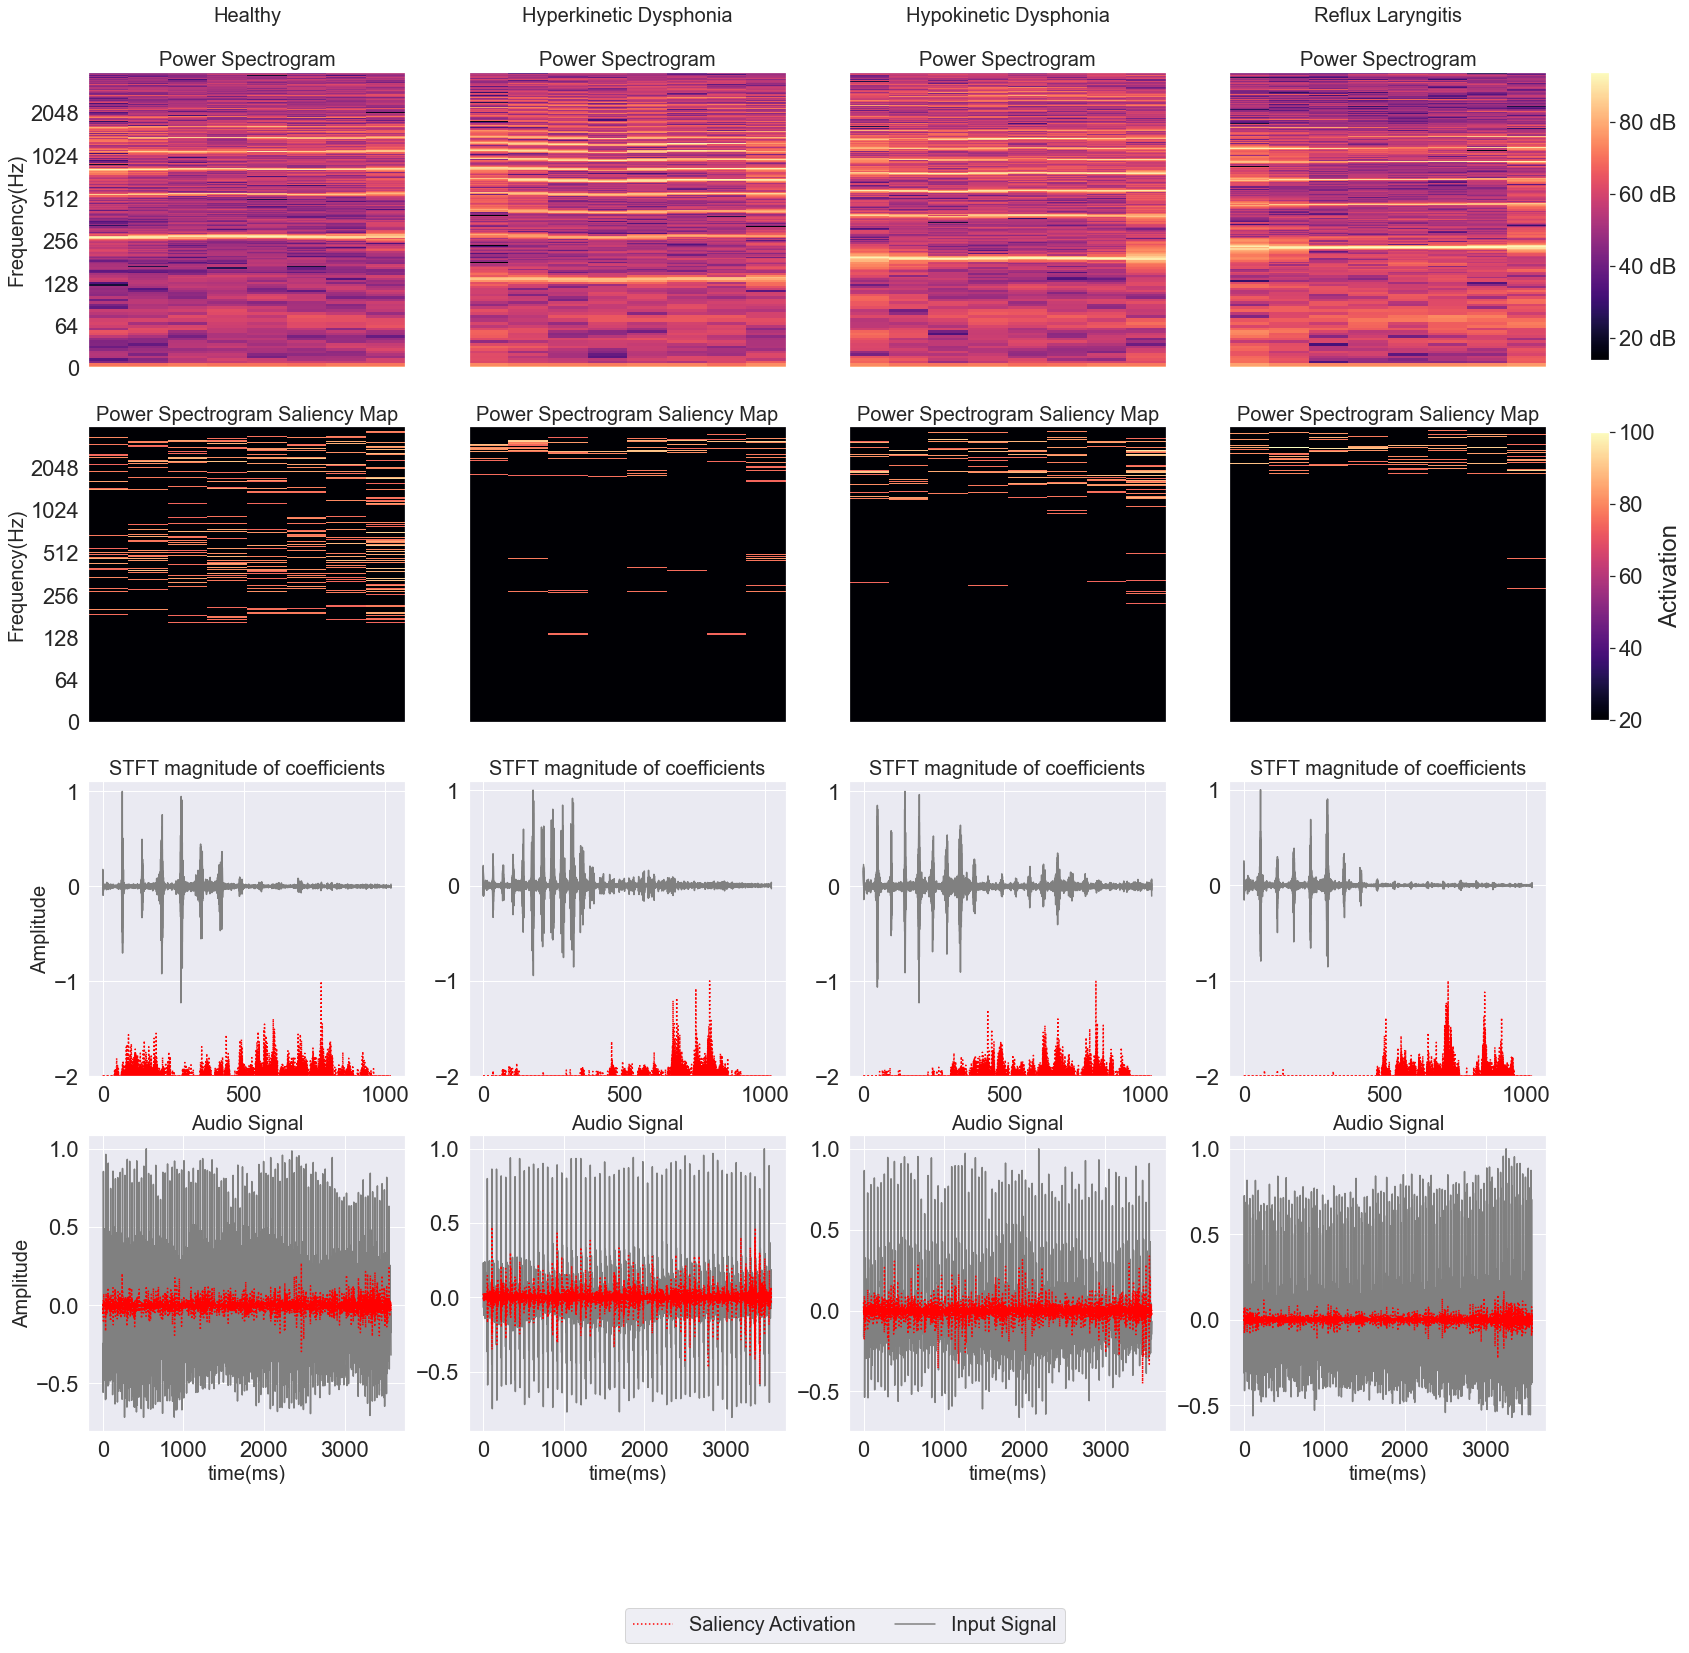

In [17]:
target_names = ['Healthy', 'Hyperkinetic Dysphonia', 'Hypokinetic Dysphonia','Reflux Laryngitis']
from collections import defaultdict
import random
dic = defaultdict(list)
for i in range(len(stft_grad)):
    dic[clean_labels[i]].append((stft_grad[i],i))
L,W=25,30

fig, axs = plt.subplots(4,4, figsize=(W, L))


# axs.figure(figsize=(L,W))
# fig.figure(figsize=(L,W))
# clas  = 2
index = 193#random.randint(0,len(dic[clas]))
print(index)
for clas in range(4):

    g_stft =np.array(dic[clas][index][0])
    g_aud = librosa.istft(g_stft)

    o_stft = stft_denoised[dic[clas][index][1]]
    o_aud = librosa.istft(o_stft)
    n_g_stft=(g_stft/np.max(g_stft)) * (g_stft/np.max(g_stft) > 0.05)

    img =librosa.display.specshow(librosa.amplitude_to_db(o_stft,ref=np.min),sr=8000,y_axis='log',ax=axs[0,clas])
    axs[0,clas].set_title(target_names[clas]+'\n\nPower Spectrogram',fontsize=20)
#     axs[0,clas].set_ylabel('Hz',fontsize=15)
    
    
#     temp = np.array((n_g_stft-np.abs(o_stft))/(np.max(n_g_stft)-np.min(n_g_stft)),dtype='uint8')

    img2 = librosa.display.specshow(librosa.amplitude_to_db(n_g_stft,ref=np.min),sr=8000,y_axis='log',ax=axs[1,clas])
    axs[1,clas].set_title('Power Spectrogram Saliency Map',fontsize=20)
#     axs[1,clas].set_ylabel('Hz',fontsize=15)
    
    
    axs[2,clas].plot(o_stft/np.max(o_stft),color = 'gray')
    axs[2,clas].set_ylim(bottom = -2)
    axs[2,clas].plot(n_g_stft-2,ls = 'dotted',color = 'red')
    axs[2,clas].set_title('STFT magnitude of coefficients',fontsize=20)
#     axs[2, clas].set_ylabel('frequency',fontsize=15)
    
    b, = axs[3,clas].plot(o_aud/np.max(o_aud),color = 'gray')
    a, = axs[3,clas].plot((g_aud)*o_aud/(np.max(g_aud)),color = 'red',ls ='dotted')
    axs[3, clas].set_title('Audio Signal',fontsize=20)
#     axs[0, clas].set_title(target_names[clas])
#     axs[3, clas].set_ylabel('Amplitude',fontsize=15)
for j in range(2):
    for i in range(1,4):
            axs[j, i].get_yaxis().set_visible(False)
val=['Frequency(Hz)','Frequency(Hz)',"Amplitude",'Amplitude']
[axs[i, 0].set_ylabel(val[i],fontsize=20) for i in range(4)]
[axs[3, i].set_xlabel('time(ms)',fontsize=20) for i in range(4)]
b.set_label('Input Signal')
a.set_label('Saliency Activation')
fig.subplots_adjust(right=0.8)

cbar_ax1 = fig.add_axes([0.82, 0.72, 0.009, 0.16])
cbar_ax2 = fig.add_axes([0.82, 0.52, 0.009, 0.16])
# fig.colorbar(im, cax=cbar_ax)

fig.colorbar(img,  cax=cbar_ax1, format="%2.0f dB")
fig.colorbar(img2,  cax=cbar_ax2, label='Activation')
fig.legend(handles=[a, b],loc='lower center',fontsize=20,ncol=2)
# fig.savefig(f'./IMG/stft/jpg/STFT_Saliency.png',bbox_inches='tight',dpi=200)
# fig.savefig(f'./IMG/stft/eps/STFT_Saliency.eps',bbox_inches='tight',dpi=200)
#     193

In [18]:
np.mean(n_g_stft)

0.014314706812179992

In [19]:
"""
Epoch= 9802 acc =  0.9709 sensitivity 0.983 specificity= 0.9911 precision= 0.973
"""
# X_train.shape, X_test.shape,y_train.shape, y_test.shape 
mfcc_denoised=[]
for i in tqdm(denoised):
    mfcc_denoised.append(librosa.feature.mfcc(np.reshape(i,(3872)),sr = 8000,n_mfcc=26))
mfcc_denoised = np.array(mfcc_denoised)
mfcc_denoised.shape

100%|█████████████████████████████████████████████████████████████████████████████| 2060/2060 [00:08<00:00, 239.76it/s]


(2060, 26, 8)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 24, 256)           6400      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 12, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 256)            327936    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 256)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2, 256)            196864    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 256)            0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

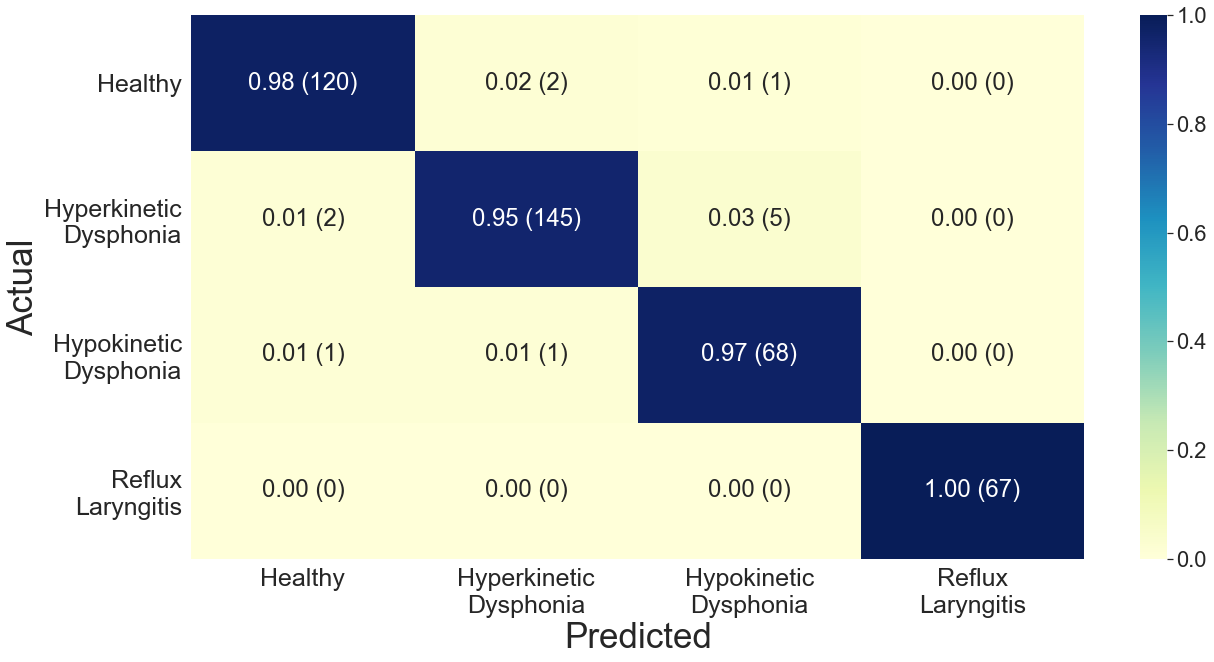

In [20]:
X_train, X_test,y_train, y_test = train_test_split(mfcc_denoised,output_matrix ,
                                       random_state=98, 
                                       test_size=0.2, 
                                       shuffle=True)
model = tf.keras.models.load_model('new_mfcc_model.h5')
model.summary()
target_names = ['Healthy', 'Hyperkinetic\nDysphonia', 'Hypokinetic\nDysphonia','Reflux\nLaryngitis']
y_true = np.argmax(y_test,axis =-1)
y_pred = np.argmax(model.predict(X_test),axis =-1)
print(sklearn.metrics.accuracy_score(y_true, y_pred))
print(sklearn.metrics.classification_report(y_true, y_pred,labels=[0,1,2,3], target_names=target_names))
print(sklearn.metrics.confusion_matrix(y_true, y_pred,labels=[0,1,2,3]))
# specificity = recall_score((y_true).tolist(), (y_pred).tolist(), pos_label=0 ,average = None)
# print("SPECIFICiTY=", specificity)
mcm = multilabel_confusion_matrix((y_true).tolist(), (y_pred).tolist())

tps = mcm[:, 1, 1]
tns = mcm[:, 0, 0]

specificity = tns / (tns + mcm[:, 0, 1])        # Specificity
print("SPECIFICiTY=", specificity)
def plot_conf_mat(Ground_Truth_Labels, Predictions):
  confusion_matrix_raw = sklearn.metrics.confusion_matrix(Ground_Truth_Labels, Predictions, normalize=None)
  confusion_matrix_norm = sklearn.metrics.confusion_matrix(Ground_Truth_Labels, Predictions, normalize='true')
  shape = confusion_matrix_raw.shape
  data = np.asarray(confusion_matrix_raw, dtype=int)
  text = np.asarray(confusion_matrix_norm, dtype=float)
  annots = (np.asarray(["{0:.2f} ({1:.0f})".format(text, data) for text, data in zip(text.flatten(), data.flatten())])).reshape(shape[0],shape[1])
  fig = plt.figure(figsize=(20, 10))
  sns.set(font_scale=2)
  g = sns.heatmap(confusion_matrix_norm, cmap='YlGnBu', annot=annots, fmt='', xticklabels=target_names, yticklabels=target_names)
  g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 25) 
  g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 25) 
#   plt.title('MFCC Confusion Matrix', fontsize=25)
  plt.xlabel("Predicted", fontsize=35)
  plt.ylabel("Actual", fontsize=35)
#   plt.savefig('./IMG/feat/jpg/MFCC_CM.png',bbox_inches='tight',dpi=200)
#   plt.savefig('./IMG/feat/eps/MFCC_CM.eps',bbox_inches='tight',dpi=200)
# # #
plot_conf_mat(y_true, y_pred)

[2 1 0]
[2 1 0]
[2 1 0]
[2 1 0]
ROC AUC score: 0.9826903439902788


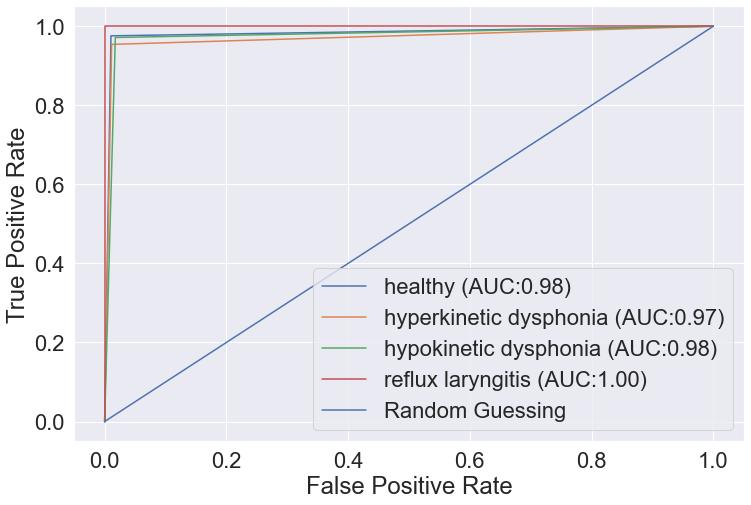

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [22]:
target= ['healthy', 'hyperkinetic dysphonia', 'hypokinetic dysphonia','reflux laryngitis']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        print(thresholds)
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_true, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()
fig.savefig('./IMG/feat/jpg/MFCC_AUC.png',bbox_inches='tight',dpi=200)
fig.savefig('./IMG/feat/eps/MFCC_AUC.eps',bbox_inches='tight',dpi=200)

In [ ]:


model = tf.keras.models.load_model('new_mfcc_model.h5')
assert model.layers[-1].activation == tf.keras.activations.softmax

config = model.layers[-1].get_config()
weights = [x.numpy() for x in model.layers[-1].weights]

config['activation'] = tf.keras.activations.linear
config['name'] = 'logits'

new_layer = tf.keras.layers.Dense(**config)(model.layers[-2].output)
new_model = tf.keras.Model(inputs=[model.input], outputs=[new_layer])
new_model.layers[-1].set_weights(weights)

assert new_model.layers[-1].activation == tf.keras.activations.linear
def my_CE(y_true, y_pred):
    smoothing =0
    log_y_pred = tf.math.log(y_pred+smoothing) 
    element_wise = -tf.math.multiply_no_nan(x=log_y_pred, y=y_true)
    return tf.reduce_mean(tf.reduce_sum(element_wise,axis=1))
gradients =[]

for samp,expected_output in tqdm(zip(mfcc_denoised,output_matrix)):
    with tf.GradientTape() as tape:
        # cast image to float
        inputs = tf.cast(np.reshape(samp,(1,26,8)),dtype='float32')

        # watch the input pixels
        tape.watch(inputs)

        # generate the predictions
        predictions = new_model(inputs)

        # get the loss
    #     print(expected_output, predictions)
    #     loss = tf.keras.losses.categorical_crossentropy(
    #         expected_output, (predictions)
    #     )

        loss =my_CE(expected_output,predictions) 
#         print(expected_output, predictions,loss)

    # get the gradient with respect to the inputs
    # K.gradients(K.mean(model.layers[-2].output[0, :], axis=-1), model.layers[-5].layers[-2].output)[0]
    gradients.append(tape.gradient(loss, inputs)[0])
mfcc_grad=np.zeros((2060,26,8))
for i in range(len(gradients)):
    mfcc_grad[i] = gradients[i]
mfcc_grad.shape

68


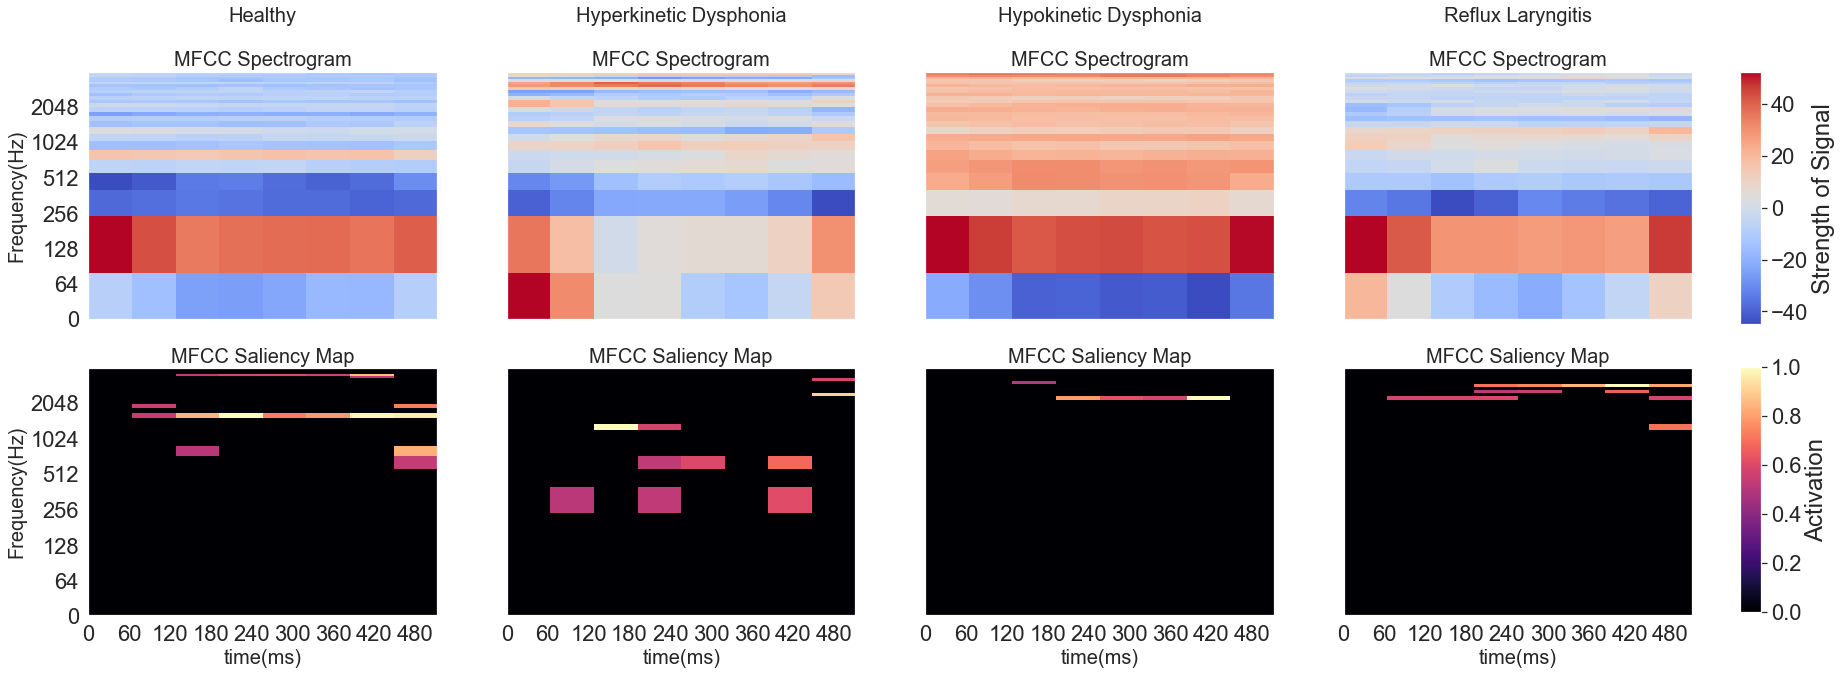

In [38]:
target_names = ['Healthy', 'Hyperkinetic Dysphonia', 'Hypokinetic Dysphonia','Reflux Laryngitis']
from collections import defaultdict
import random
dic = defaultdict(list)
for i in range(len(mfcc_grad)):
    dic[clean_labels[i]].append((mfcc_grad[i],i))
L,W=10,33

fig, axs = plt.subplots(2,4, figsize=(W, L))


# axs.figure(figsize=(L,W))
# fig.figure(figsize=(L,W))
# clas  = 2
index = 68# random.randint(0,len(dic[clas]))
print(index)
for clas in range(4):

    g_stft =dic[clas][index][0]
    o_stft = mfcc_denoised[dic[clas][index][1]]
    n_g_stft=n_g_stft=(g_stft/np.max(g_stft)) * (g_stft/np.max(g_stft) > 0.5)

    img =librosa.display.specshow(o_stft,sr=8000,y_axis='log',ax=axs[0,clas])
    axs[0,clas].set_title(target_names[clas]+'\n\nMFCC Spectrogram',fontsize=20)
#     axs[0,clas].set_ylabel('Hz',fontsize=15)
    
    
    temp = np.array((n_g_stft-np.abs(o_stft))/(np.max(n_g_stft)-np.min(n_g_stft)),dtype='uint8')

    img2 = librosa.display.specshow(n_g_stft,sr=8000,y_axis='log',x_axis='ms',ax=axs[1,clas])
    axs[1,clas].set_title('MFCC Saliency Map',fontsize=20)
#     axs[1,clas].set_ylabel('Hz',fontsize=15)
    
for j in range(2):
    for i in range(1,4):
            axs[j, i].get_yaxis().set_visible(False)
val=['Frequency(Hz)','Frequency(Hz)',"Amplitude",'Amplitude']
[axs[i, 0].set_ylabel(val[i],fontsize=20) for i in range(2)]
[axs[1, i].set_xlabel('time(ms)',fontsize=20) for i in range(4)]


# [ for i in range(1,4)]

fig.subplots_adjust(right=0.8)

cbar_ax1 = fig.add_axes([0.82, 0.53, 0.009, 0.35])
cbar_ax2 = fig.add_axes([0.82, 0.13, 0.009, 0.34])
# fig.colorbar(im, cax=cbar_ax)

fig.colorbar(img,  cax=cbar_ax1, label='Strength of Signal')
fig.colorbar(img2,  cax=cbar_ax2, label='Activation')
# fig.legend(handles=[a, b],loc='lower center',fontsize=15,ncol=2)
fig.savefig(f'./IMG/stft/jpg/MFCC_Saliency.png',bbox_inches='tight',dpi=200)
fig.savefig(f'./IMG/stft/eps/MFCC_Saliency.eps',bbox_inches='tight',dpi=200)
# #     193 242

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


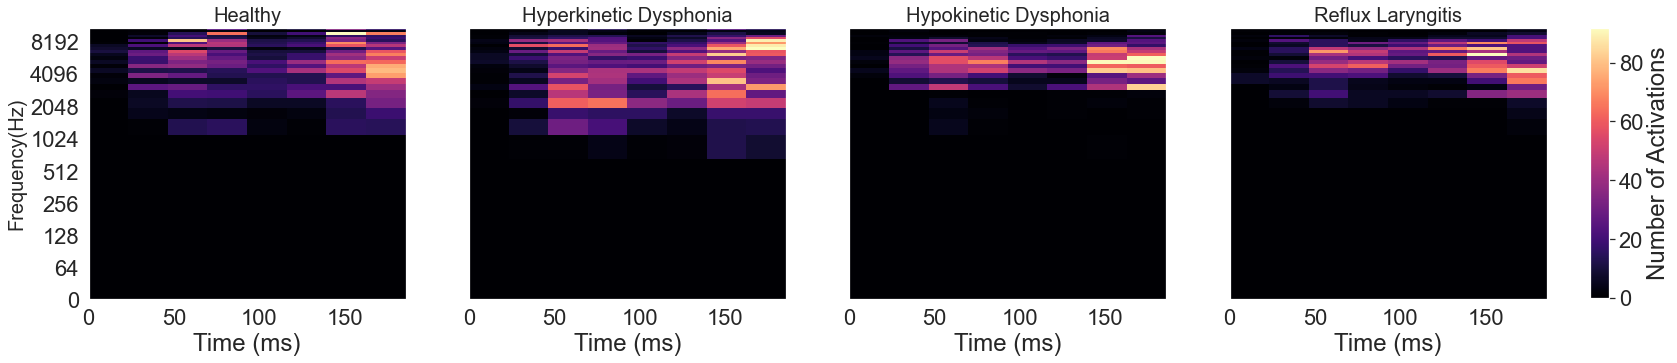

In [20]:
coun = defaultdict(list)
for i in range(len(mfcc_grad)):
#     t = n_g_stft=n_g_stft=(g_stft/np.max(g_stft)) * (g_stft/np.max(g_stft) > 0.5)
    cnfig = mfcc_grad[i]
    t=(cnfig/np.max(cnfig))*(cnfig/np.max(cnfig)>0.5)
    coun[clean_labels[i]].append(t)
L,W=5,30
fig, axs = plt.subplots(1,4, figsize=(W, L))    
for clas in range(4):
    
    c_mfcc=np.zeros((cnfig.shape))
    for i in range(len(coun[clas])):
        for j in range(len(coun[clas][i])):
            for k in range(len(coun[clas][i][j])):
                if coun[clas][i][j][k]>=0.6:
                    c_mfcc[j][k]+=1
    img = librosa.display.specshow(c_mfcc,x_axis='ms',y_axis = 'log',ax=axs[clas])
    
    axs[clas].set_title(target_names[clas],fontsize=20)

for i in range(1,4):
        axs[ i].get_yaxis().set_visible(False)
axs[0].set_ylabel('Frequency(Hz)',fontsize=20)
fig.subplots_adjust(right=0.8)
cbar_ax2 = fig.add_axes([0.82, 0.13, 0.009, 0.75])    
fig.colorbar(img,  cax=cbar_ax2, label='Number of Activations')
fig.savefig(f'./IMG/stft/jpg/MFCC_Saliency_common.png',bbox_inches='tight',dpi=200)
fig.savefig(f'./IMG/stft/eps/MFCC_Saliency_common.eps',bbox_inches='tight',dpi=200)
#     print(i)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


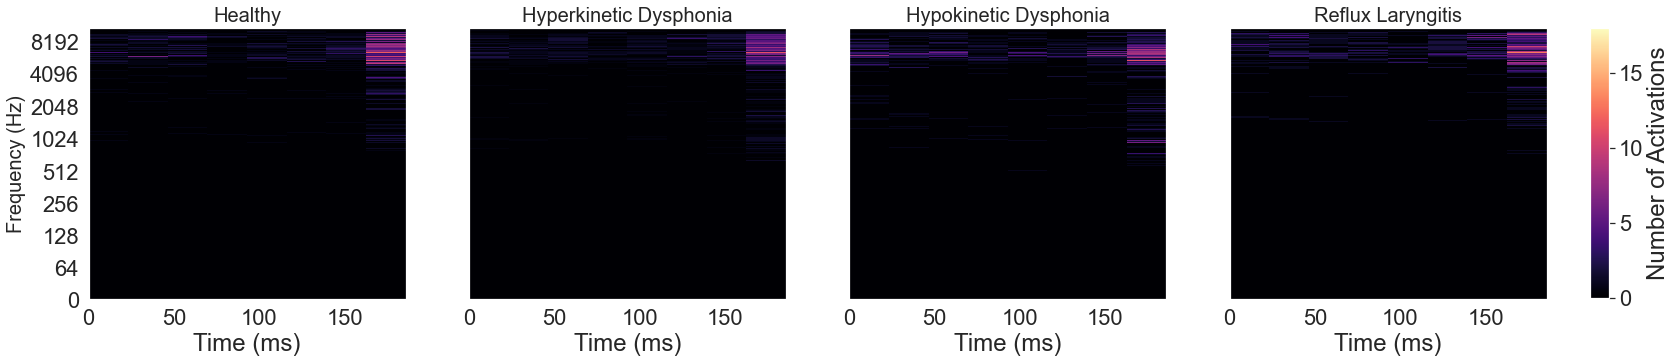

In [88]:
coun = defaultdict(list)
for i in range(len(stft_grad)):
#     t = n_g_stft=n_g_stft=(g_stft/np.max(g_stft)) * (g_stft/np.max(g_stft) > 0.5)
    cnfig = stft_grad[i]
    t=(cnfig/np.max(cnfig))*(cnfig/np.max(cnfig)>0.5)
    coun[clean_labels[i]].append(t)
L,W=5,30
fig, axs = plt.subplots(1,4, figsize=(W, L))    
for clas in range(4):
    
    c_mfcc=np.zeros((cnfig.shape))
    for i in range(len(coun[clas])):
        for j in range(len(coun[clas][i])):
            for k in range(len(coun[clas][i][j])):
                if coun[clas][i][j][k]/np.max(coun[clas][i][j])>=0.6:
                    c_mfcc[j][k]+=1
    img = librosa.display.specshow(c_mfcc,x_axis='ms',y_axis='log',ax=axs[clas])
    
    axs[clas].set_title(target_names[clas],fontsize=20)
for i in range(1,4):
        axs[ i].get_yaxis().set_visible(False)
axs[0].set_ylabel('Frequency (Hz)',fontsize=20)
fig.subplots_adjust(right=0.8)
cbar_ax2 = fig.add_axes([0.82, 0.13, 0.009, 0.75])    
fig.colorbar(img,  cax=cbar_ax2, label='Number of Activations')
fig.savefig(f'./IMG/stft/jpg/STFT_Saliency_common.png',bbox_inches='tight',dpi=200)
fig.savefig(f'./IMG/stft/eps/STFT_Saliency_common.eps',bbox_inches='tight',dpi=200)
# #     print(i)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


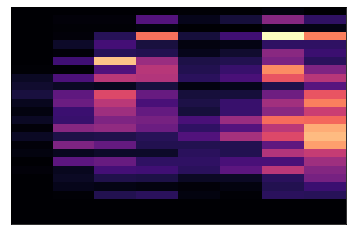

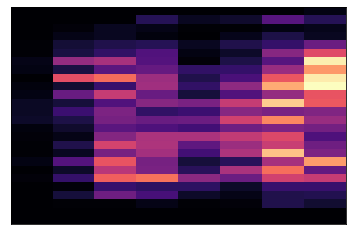

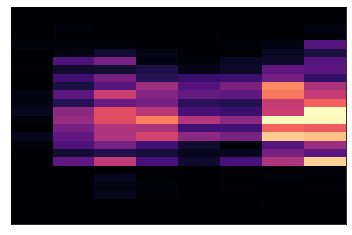

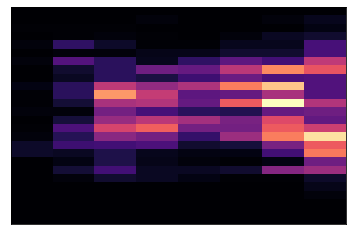

In [449]:
coun = defaultdict(list)
for i in range(len(grad)):
#     t = n_g_stft=n_g_stft=(g_stft/np.max(g_stft)) * (g_stft/np.max(g_stft) > 0.5)
    cnfig = mfcc_grad[i]
    t=(cnfig/np.max(cnfig))*(cnfig/np.max(cnfig)>0.5)
    coun[clean_labels[i]].append(t)
    
for clas in range(4):
    
    c_mfcc=np.zeros((cnfig.shape))
    for i in range(len(coun[clas])):
        for j in range(len(coun[clas][i])):
            for k in range(len(coun[clas][i][j])):
                if coun[clas][i][j][k]>=0.6:
                    c_mfcc[j][k]+=1
    librosa.display.specshow(c_mfcc)
    plt.show()

#     print(i)

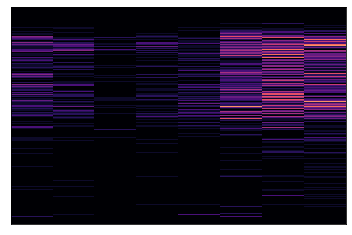

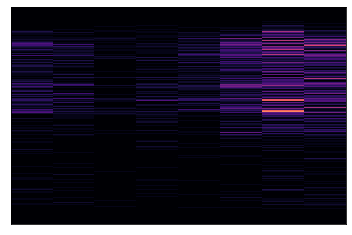

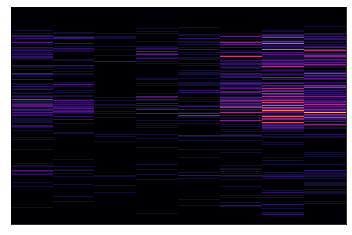

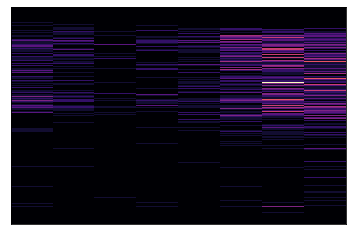

In [450]:
coun = defaultdict(list)
for i in range(len(grad)):
#     t = n_g_stft=n_g_stft=(g_stft/np.max(g_stft)) * (g_stft/np.max(g_stft) > 0.5)
    cnfig = stft_grad[i]
    t=(cnfig/np.max(cnfig))*(cnfig/np.max(cnfig)>0.5)
    coun[clean_labels[i]].append(t)
    
for clas in range(4):
    c_mfcc=np.zeros((cnfig.shape))
    for i in range(len(coun[clas])):
        for j in range(len(coun[clas][i])):
            for k in range(len(coun[clas][i][j])):
                if coun[clas][i][j][k]>=0.6:
                    c_mfcc[j][k]+=1
    librosa.display.specshow(c_mfcc)
    plt.show()

In [247]:
# # temp = np.array((n_g_stft-np.abs(o_stft))/(np.max(n_g_stft)-np.min(n_g_stft)),dtype='uint8')
# plt.figure(figsize=(20,5))
# temp = np.array(((g_aud-np.abs(o_aud))/(np.max(g_aud)-np.min(g_aud))),dtype='uint8')
# # librosa.display.specshow(librosa.amplitude_to_db(temp,ref=np.min),sr=8000,y_axis='log',cmap='hot',ax=axs[0,clas])
# plt.plot(o_aud/np.max(o_aud),color = 'gray')
# plt.plot(temp/np.max(temp),color = 'red',ls ='dotted')
# plt.show()
# # plt.plot(mfcc_denoised[0]/np.max(mfcc_denoised[0]))
# # plt.show()
# # plt.plot(grad[0]/np.max(grad[0]))
# # plt.show()
# # librosa.display.specshow(mfcc_denoised[0]/np.max(mfcc_denoised[0]),sr=8000,y_axis='log')
# # plt.show()
# # librosa.display.specshow(grad[0]/np.max(grad[0]),cmap ='inferno',sr=8000,y_axis='log')
# # plt.show()
# # librosa.display.specshow(librosa.feature.inverse.mfcc_to_mel(mfcc_denoised[0], n_mels=8000),sr=8000,y_axis='log')
# # plt.show()
# # librosa.display.specshow(librosa.feature.inverse.mfcc_to_mel(grad[0], n_mels=8000),sr=8000,y_axis='log')
# # plt.show()
# # librosa.feature.inverse.mfcc_to_mel(mfcc, *, n_mels=128, dct_type=2, norm='ortho', ref=1.0, lifter=0)

In [118]:
# # from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
# # librosa.display.specshow(mfcc_denoised[0]/np.max(mfcc_denoised[0]),sr=8000,y_axis='log')
# # plt.show()
# # librosa.display.specshow(grad[0],cmap ='inferno',sr=8000,y_axis='log')
# # plt.show()


# import librosa.display
# from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# fig = plt.Figure()
# canvas = FigureCanvas(fig)
# ax = fig.add_subplot(111)
# librosa.display.specshow(grad[0], sr=8000, x_axis='time',cmap ='hot',ax = ax)
# # librosa.display.specshow(librosa.amplitude_to_db(grad[0],ref=np.min),sr=8000,y_axis='log', ax=ax)
# ax.axis('off')
# fig.savefig('temp.png',bbox_inches='tight',pad_inches = 0,dpi=200)

# fig = plt.Figure()
# canvas = FigureCanvas(fig)
# ax = fig.add_subplot(111)
# librosa.display.specshow(mfcc_denoised[0], sr=8000 , x_axis='time',ax = ax)
# # librosa.display.specshow(librosa.amplitude_to_db(stft_denoised[0],ref=np.min),sr=8000,y_axis='log', ax=ax)

# ax.axis('off')
# fig.savefig('mftemp.png',bbox_inches='tight',pad_inches = 0,dpi=200)


In [248]:
# img = cv2.imread('temp.png')/255.0
# print(img.shape)
# grayscale_tensor = tf.reduce_sum(tf.abs(img), axis=-1)
# normalized_tensor = tf.cast(
#     255
#     * (grayscale_tensor - tf.reduce_min(grayscale_tensor))
#     / (tf.reduce_max(grayscale_tensor) - tf.reduce_min(grayscale_tensor)),
#     tf.uint8,
# )

# # remove the channel dimension to make the tensor a 2d tensor
# normalized_tensor = tf.squeeze(normalized_tensor)
# max_pixel = np.unravel_index(np.argmax(grayscale_tensor[0]), grayscale_tensor[0].shape)
# min_pixel = np.unravel_index(np.argmin(grayscale_tensor[0]), grayscale_tensor[0].shape)

# plt.figure(figsize=(8, 8))
# plt.imshow(normalized_tensor, cmap='gray')
# plt.show()

# img = cv2.imread('mftemp.png')/255.0
# gradient_color = cv2.applyColorMap(normalized_tensor.numpy(), cv2.COL)
# gradient_color = gradient_color / 255.0
# super_imposed = cv2.addWeighted(img, 0.5, gradient_color, 0.5, 0.0)

# plt.figure(figsize=(8, 8))
# plt.imshow(super_imposed)
# plt.show()